In [22]:
import pandas as pd
import numpy as np
import os 
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [23]:
filename = r"C:\Users\thema\OneDrive\Projects\JPMC_Fraud_Analysis\data\fraudTrain.csv"

df=pd.read_csv(filename)

In [24]:
df.shape

(1296675, 23)

In [25]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [26]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [27]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [28]:
duplicates = df.duplicated().sum()
duplicates

0

In [29]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [30]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [31]:
# Convert string datetime to pandas datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract year, month, day, hour, minute, and second as separate columns
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.dayofweek
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second

# Drop the original datetime column
df = df.drop(columns=['trans_date_trans_time'])

In [32]:
df['year'].unique()

array([2019, 2020])

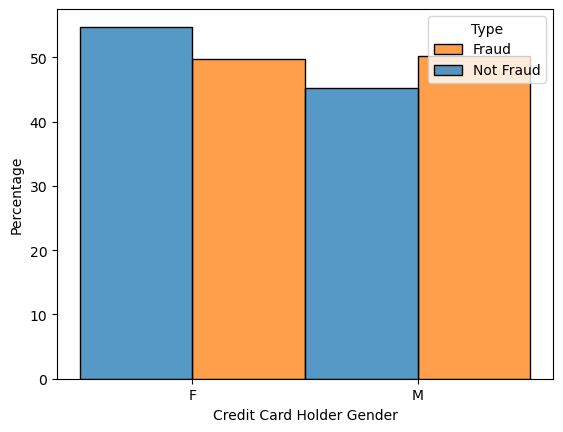

In [33]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [35]:
# New age collumn for each person according to transaction

df['dob'] = pd.to_datetime(df['dob'])
df['age']=df['year'] - df['dob'].dt.year

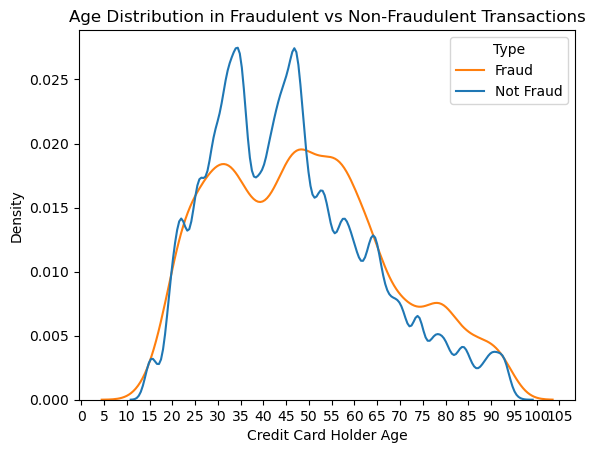

In [36]:
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

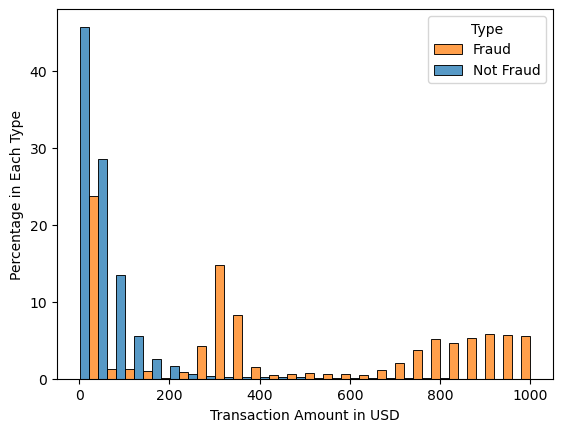

In [37]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [38]:
# Function to calculate and plot the percentage of fraud transactions
def plot_fraud_percentage(data, title, xlabel):
    data['Fraud_Percentage'] = (data['Fraud'] / data['Total']) * 100
    ax = data['Fraud_Percentage'].plot(kind='bar', figsize=(12, 6), color='#d9534f')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Fraud Percentage (%)')
    plt.show()




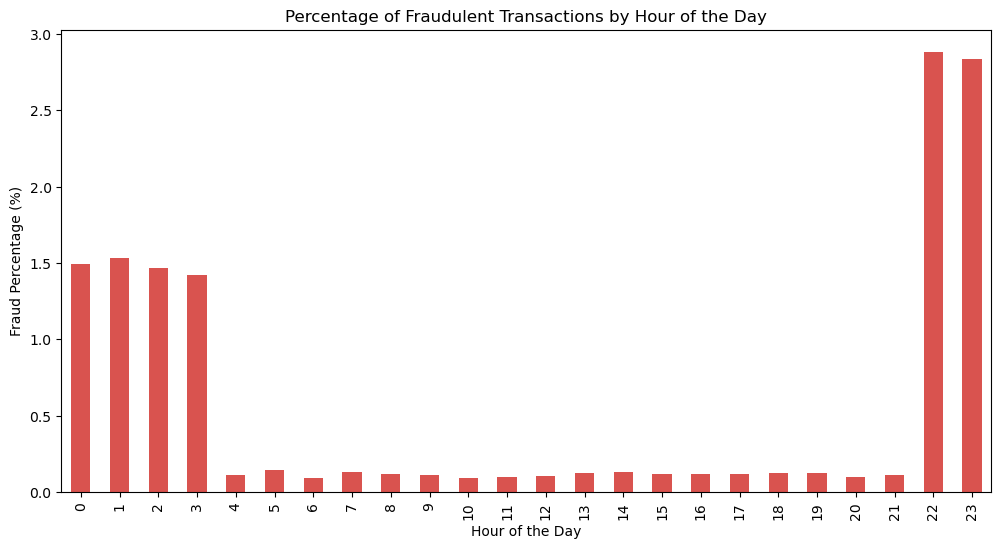

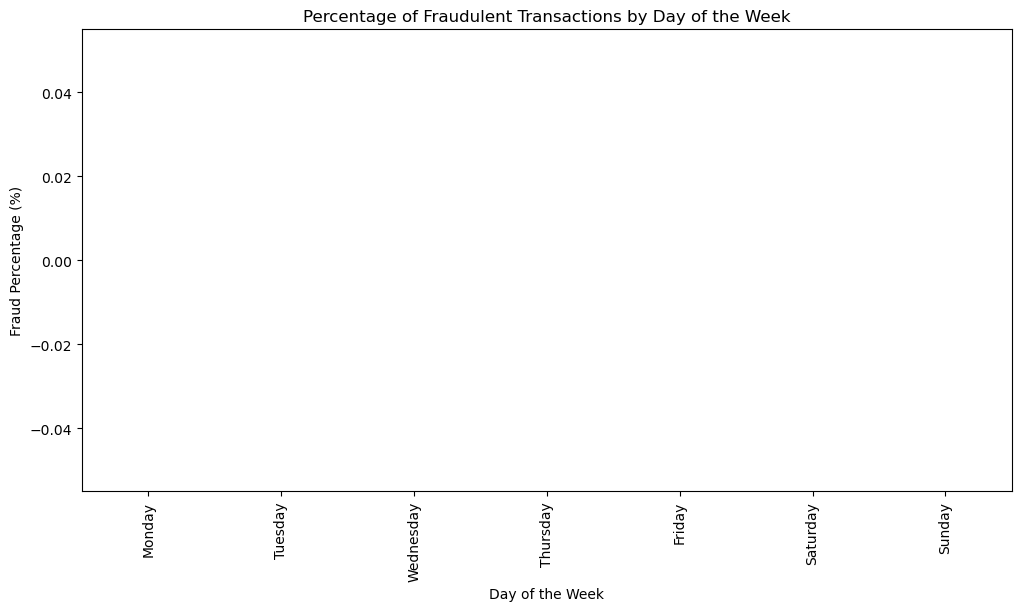

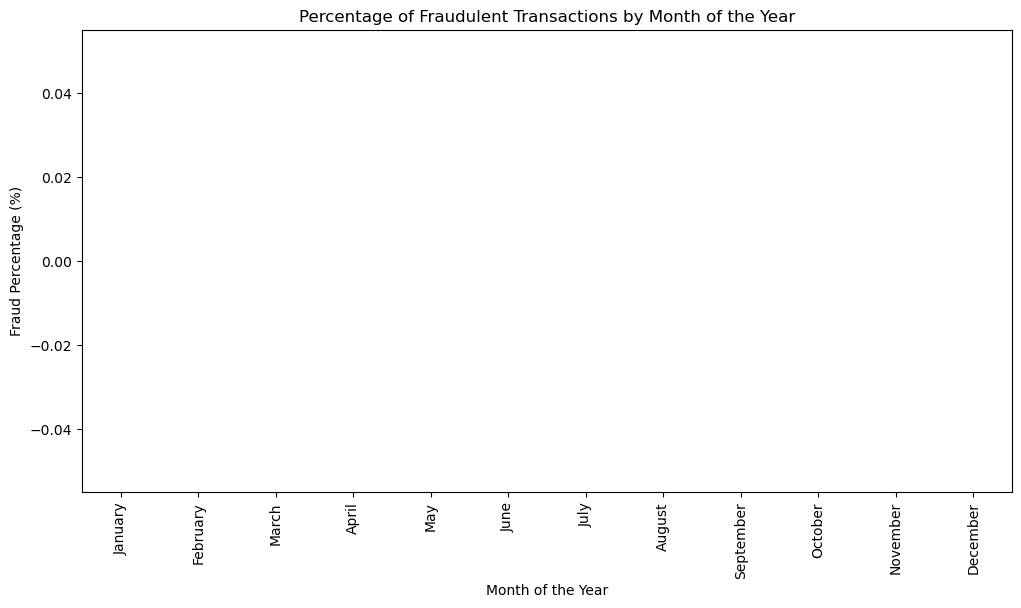

In [39]:
#group by hours of the day
group_by_hour = df.groupby('hour')['is_fraud'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Fraud'})
plot_fraud_percentage(group_by_hour, 'Percentage of Fraudulent Transactions by Hour of the Day', 'Hour of the Day')

# Group by day of the week
group_by_day = df.groupby('day')['is_fraud'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Fraud'}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plot_fraud_percentage(group_by_day, 'Percentage of Fraudulent Transactions by Day of the Week', 'Day of the Week')

# Group by month of the year
group_by_month = df.groupby('month')['is_fraud'].agg(['count', 'sum']).rename(columns={'count': 'Total', 'sum': 'Fraud'}).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plot_fraud_percentage(group_by_month, 'Percentage of Fraudulent Transactions by Month of the Year', 'Month of the Year')

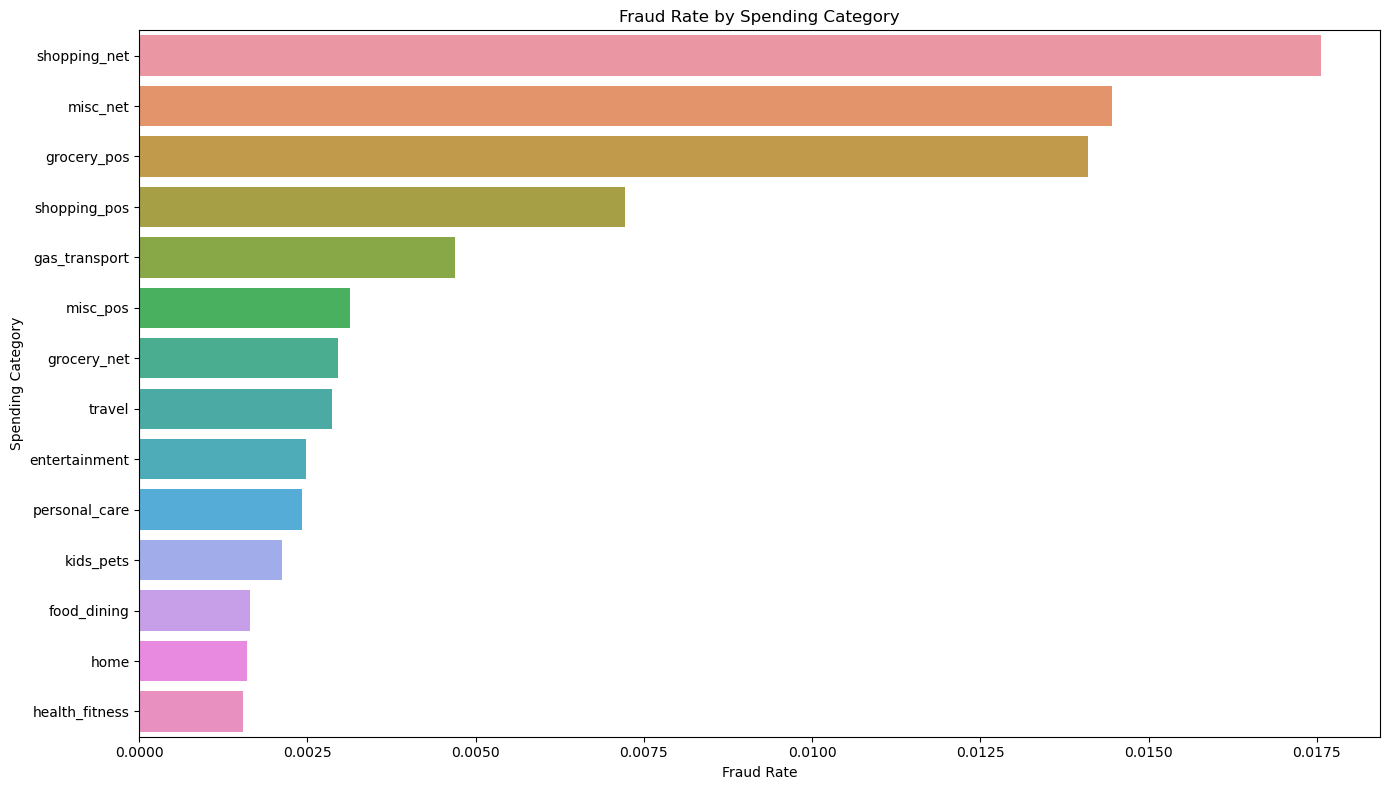

In [ ]:
# Create a new subplot for the graph focusing on spending category
fig, ax = plt.subplots(figsize=(14, 8))

# Check if the 'category' and 'is_fraud' columns exist in the dataframe

# Calculate fraud rates for 'category'
fraud_rate_category = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

# Plotting the relationship between 'category' and 'is_fraud'
sns.barplot(y=fraud_rate_category.index, x=fraud_rate_category.values, ax=ax, orient='h')
ax.set_title('Fraud Rate by Spending Category')
ax.set_xlabel('Fraud Rate')
ax.set_ylabel('Spending Category')


plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'age'],
      dtype='object')

In [ ]:
filtered_df = df.drop(columns = ['cc_num','merchant','gender','street','city','job', 'dob', 'year', 'minute', 'second', 'trans_num', 'first', 'last'])
filtered_df.head()

,category,amt,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,month,day,hour,age
0,misc_net,4.97,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,1,1,0,31
1,grocery_pos,107.23,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,1,1,0,41
2,entertainment,220.11,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1,1,0,57
3,gas_transport,45.00,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1,1,0,52
4,misc_pos,41.96,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1,1,0,33


In [ ]:
filtered_df.columns

Index(['category', 'amt', 'state', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'month', 'day',
       'hour', 'age'],
      dtype='object')